<a href="https://colab.research.google.com/github/A-THAKUR22/WeeklyAssignments/blob/main/WeeklyAssignment6(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Earthquake Prediction Model with Machine Learning


Importing Necessary Libraries:
Begin by importing the required libraries for data manipulation, visualization, and machine learning algorithms such as pandas, numpy, matplotlib, scikit-learn, and keras.

Loading and Reading the Dataset:
Load the earthquake dataset into a DataFrame and read its contents to understand the data structure and features.

Main Characteristics of Earthquake Data:
Extract the main characteristics of the earthquake data, including date, time, latitude, longitude, depth, and magnitude.

Scaling Data:
Scale the data, particularly the date and time, by converting them to Unix time (seconds since the Unix epoch) to prepare them for model input.

Data Visualization:
Visualize the earthquake data on a world map to depict the frequency and distribution of earthquakes based on latitude, longitude, and magnitude.

Splitting the Dataset:
Divide the data into input features (X) and target variables (y) for model training and testing. Use a train-test split with a validation set, typically 80% training and 20% testing data.

Neural Network Model:
Create a neural network model using Keras with specified layers, nodes, and activation functions to predict earthquake magnitude and depth based on input features.

Hyperparameter Tuning:
Define hyperparameters with multiple options (e.g., batch size, epochs, optimizer) to find the best-fit model configuration using techniques like grid search or random search.

Finding the Best Fit Model:
Use hyperparameter tuning techniques to find the best-fit model configuration that maximizes performance metrics such as accuracy or mean squared error.

Evaluation on Test Data:
Evaluate the best-fit model on the test data to assess its predictive capabilities. Measure metrics such as loss (e.g., mean squared error) and accuracy to determine the model's effectiveness in earthquake prediction.

In [22]:
pip install cartopy

In [42]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import GridSearchCV
import cartopy.crs as ccrs
import cartopy
from datetime import datetime
from sklearn.metrics import r2_score

In [24]:
#Read the data from csv file
data = pd.read_csv('database.csv')
data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [25]:
#Checking null values
data.isnull().sum()

Date                              0
Time                              0
Latitude                          0
Longitude                         0
Type                              0
Depth                             0
Depth Error                   18951
Depth Seismic Stations        16315
Magnitude                         0
Magnitude Type                    3
Magnitude Error               23085
Magnitude Seismic Stations    20848
Azimuthal Gap                 16113
Horizontal Distance           21808
Horizontal Error              22256
Root Mean Square               6060
ID                                0
Source                            0
Location Source                   0
Magnitude Source                  0
Status                            0
dtype: int64

In [26]:
#Dropping the columns with null values and which are not required
data=data.drop(columns=['Depth Error','Depth Seismic Stations','Type','Magnitude Type','Magnitude Error','Magnitude Seismic Stations','Azimuthal Gap','Horizontal Distance','Horizontal Error','Root Mean Square','ID','Source','Location Source','Magnitude Source','Status'])

In [27]:
data

,Date,Time,Latitude,Longitude,Depth,Magnitude
0,01/02/1965,13:44:18,19.2460,145.6160,131.60,6.0
1,01/04/1965,11:29:49,1.8630,127.3520,80.00,5.8
2,01/05/1965,18:05:58,-20.5790,-173.9720,20.00,6.2
3,01/08/1965,18:49:43,-59.0760,-23.5570,15.00,5.8
4,01/09/1965,13:32:50,11.9380,126.4270,15.00,5.8
...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,12.30,5.6
23408,12/28/2016,09:13:47,38.3777,-118.8957,8.80,5.5
23409,12/28/2016,12:38:51,36.9179,140.4262,10.00,5.9
23410,12/29/2016,22:30:19,-9.0283,118.6639,79.00,6.3


In [28]:


# Combine 'Date' and 'Time' columns into a single column
datetime_str = data['Date'] + ' ' + data['Time']

# Convert the combined datetime string column to datetime objects
datetime_objs = pd.to_datetime(datetime_str, errors='coerce')

# Convert datetime objects to Unix timestamps (in seconds)
timestamps = (datetime_objs - pd.Timestamp("1970-01-01")) // pd.Timedelta(seconds=1)

# Add Unix timestamps as a new column to the dataframe
data['New_Time'] = timestamps

# Drop rows with NaT (indicating invalid datetime strings)
final_data = data.dropna(subset=['New_Time'])

# Print the resulting dataframe
print(final_data)

             Date      Time  Latitude  Longitude   Depth  Magnitude  \
0      01/02/1965  13:44:18   19.2460   145.6160  131.60        6.0   
1      01/04/1965  11:29:49    1.8630   127.3520   80.00        5.8   
2      01/05/1965  18:05:58  -20.5790  -173.9720   20.00        6.2   
3      01/08/1965  18:49:43  -59.0760   -23.5570   15.00        5.8   
4      01/09/1965  13:32:50   11.9380   126.4270   15.00        5.8   
...           ...       ...       ...        ...     ...        ...   
23407  12/28/2016  08:22:12   38.3917  -118.8941   12.30        5.6   
23408  12/28/2016  09:13:47   38.3777  -118.8957    8.80        5.5   
23409  12/28/2016  12:38:51   36.9179   140.4262   10.00        5.9   
23410  12/29/2016  22:30:19   -9.0283   118.6639   79.00        6.3   
23411  12/30/2016  20:08:28   37.3973   141.4103   11.94        5.5   

           New_Time  
0     -1.576305e+08  
1     -1.574658e+08  
2     -1.573556e+08  
3     -1.570938e+08  
4     -1.570264e+08  
...            

In [29]:
data

,Date,Time,Latitude,Longitude,Depth,Magnitude,New_Time
0,01/02/1965,13:44:18,19.2460,145.6160,131.60,6.0,-1.576305e+08
1,01/04/1965,11:29:49,1.8630,127.3520,80.00,5.8,-1.574658e+08
2,01/05/1965,18:05:58,-20.5790,-173.9720,20.00,6.2,-1.573556e+08
3,01/08/1965,18:49:43,-59.0760,-23.5570,15.00,5.8,-1.570938e+08
4,01/09/1965,13:32:50,11.9380,126.4270,15.00,5.8,-1.570264e+08
...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,12.30,5.6,1.482913e+09
23408,12/28/2016,09:13:47,38.3777,-118.8957,8.80,5.5,1.482916e+09
23409,12/28/2016,12:38:51,36.9179,140.4262,10.00,5.9,1.482929e+09
23410,12/29/2016,22:30:19,-9.0283,118.6639,79.00,6.3,1.483051e+09


In [30]:
data.isnull().sum()

Date         0
Time         0
Latitude     0
Longitude    0
Depth        0
Magnitude    0
New_Time     3
dtype: int64

In [31]:
mode_time=data['New_Time'].mode()[0]
data['New_Time'].fillna(mode_time,inplace=True)

In [32]:
data.isnull().sum()

Date         0
Time         0
Latitude     0
Longitude    0
Depth        0
Magnitude    0
New_Time     0
dtype: int64

In [33]:
#Scaling the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data[['New_Time', 'Latitude', 'Longitude', 'Depth','Magnitude']])

#Create DataFrame with scaled features
scaled_df = pd.DataFrame(scaled_data, columns=['New_Time', 'Latitude', 'Longitude', 'Depth','Magnitude'])

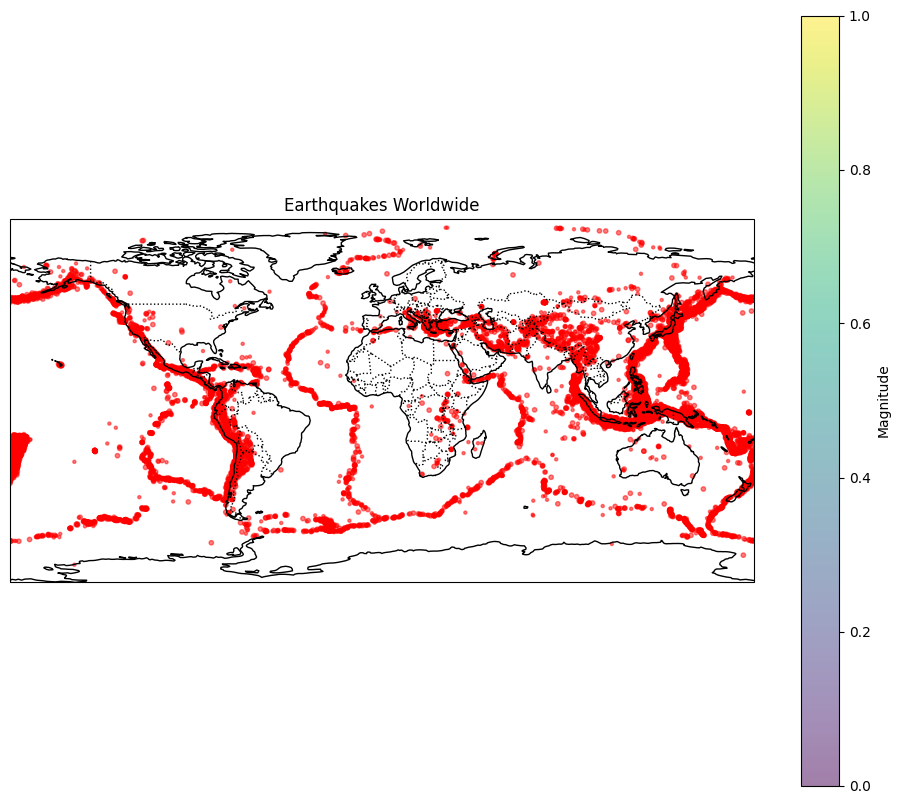

In [34]:
#Plotting the points on the world map
latitude=data['Latitude']
longitude=data['Longitude']
magnitude=data['Magnitude']

plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree())

plt.scatter(longitude, latitude, sizes=(5, 10), s=magnitude**2, c='red', alpha=0.5, transform=ccrs.PlateCarree())
ax.coastlines()
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')


plt.title('Earthquakes Worldwide')
plt.xlabel('Longitude')
plt.ylabel('Latitude')

#Add a colorbar for magnitude
cbar = plt.colorbar(label='Magnitude')


In [35]:
#Dividing the data into (X) features and (y) target variable and splitting the data into testing and training
X = scaled_df[['New_Time', 'Latitude', 'Longitude']]
y = scaled_df[['Depth','Magnitude']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [36]:
X

,New_Time,Latitude,Longitude
0,-1.949624,0.583377,0.844368
1,-1.949263,0.006109,0.698849
2,-1.949021,-0.739162,-1.701962
3,-1.948446,-2.017599,-0.503524
4,-1.948298,0.340688,0.691479
...,...,...,...
23407,1.653792,1.219182,-1.263126
23408,1.653798,1.218717,-1.263139
23409,1.653825,1.170239,0.803018
23410,1.654093,-0.355577,0.629626


In [37]:
y

,Depth,Magnitude
0,0.495984,0.277668
1,0.075272,-0.195082
2,-0.413928,0.750418
3,-0.454694,-0.195082
4,-0.454694,-0.195082
...,...,...
23407,-0.476708,-0.667832
23408,-0.505245,-0.904207
23409,-0.495461,0.041293
23410,0.067119,0.986793


In [38]:
X.isnull().sum()

New_Time     0
Latitude     0
Longitude    0
dtype: int64

In [54]:
#Creating the model
def create_model():
    model = Sequential()
    model.add(Dense(32, activation='relu', input_shape=(3,)))
    model.add(Dense(16, activation='relu'))
    model.add(Dense(2, activation='linear'))

    model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])
    model.fit(X_train, y_train, batch_size=10, epochs=50, verbose=1, validation_data=(X_test, y_test))

    return model

In [55]:
#model = KerasRegressor(build_fn=create_model, epochs=100, batch_size=10, verbose=0)

#param_grid = {'epochs': [50, 100, 150],
#           'batch_size': [10, 20, 30]}

#from sklearn.model_selection import GridSearchCV
#grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
#grid_result = grid.fit(X_train, y_train)

#Training the model
model=create_model()
#model.fit(X_train, y_train, epochs=100, batch_size=10, verbose=0)

Epoch 1/50
1873/1873 [==============================] - 6s 3ms/step - loss: 0.9565 - accuracy: 0.5315 - val_loss: 0.9910 - val_accuracy: 0.5319
Epoch 2/50
1873/1873 [==============================] - 4s 2ms/step - loss: 0.9344 - accuracy: 0.5331 - val_loss: 0.9810 - val_accuracy: 0.5550
Epoch 3/50
1873/1873 [==============================] - 4s 2ms/step - loss: 0.9243 - accuracy: 0.5376 - val_loss: 0.9709 - val_accuracy: 0.5392
Epoch 4/50
1873/1873 [==============================] - 5s 3ms/step - loss: 0.9150 - accuracy: 0.5395 - val_loss: 0.9666 - val_accuracy: 0.5356
Epoch 5/50
1873/1873 [==============================] - 4s 2ms/step - loss: 0.9080 - accuracy: 0.5404 - val_loss: 0.9549 - val_accuracy: 0.5161
Epoch 6/50
1873/1873 [==============================] - 5s 2ms/step - loss: 0.9016 - accuracy: 0.5387 - val_loss: 0.9557 - val_accuracy: 0.5537
Epoch 7/50
1873/1873 [==============================] - 5s 3ms/step - loss: 0.8947 - accuracy: 0.5440 - val_loss: 0.9423 - val_accuracy:

In [56]:
#Making predictions
y_pred = model.predict(X_test)
mse = np.mean((y_pred - y_test) ** 2)
print("Mean Squared Error on Test Data:", mse)


147/147 [==============================] - 0s 1ms/step
Mean Squared Error on Test Data: 0.8197637443892095
